In [1]:
import torch
import torchvision.models as models

from image_preprocessing import image_loader, masks_loader, plt_images
from neural_style import run_style_transfer

%matplotlib inline

In [27]:
idx = 5
path = 'examples/'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
imsize = (512, 512) if torch.cuda.is_available() else (128, 128)

#### Get images

In [28]:
style_img = image_loader(path + 'style/tar{}.png'.format(idx), imsize).to(device, torch.float)
content_img = image_loader(path + 'input/in{}.png'.format(idx), imsize).to(device, torch.float)
input_img = content_img.clone()

style_masks, content_masks = masks_loader(
    path + 'segmentation/tar{}.png'.format(idx),
    path + 'segmentation/in{}.png'.format(idx),
    imsize)

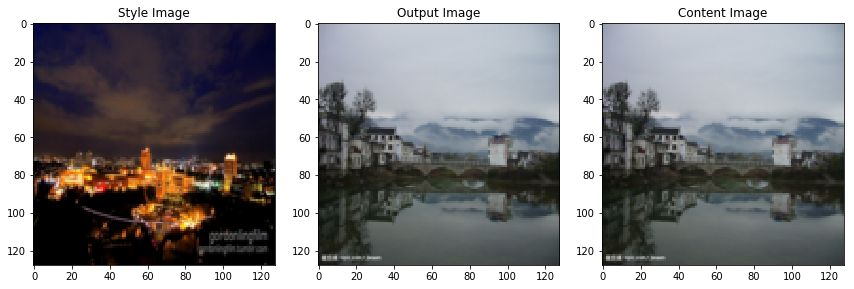

In [29]:
plt_images(style_img, input_img, content_img)

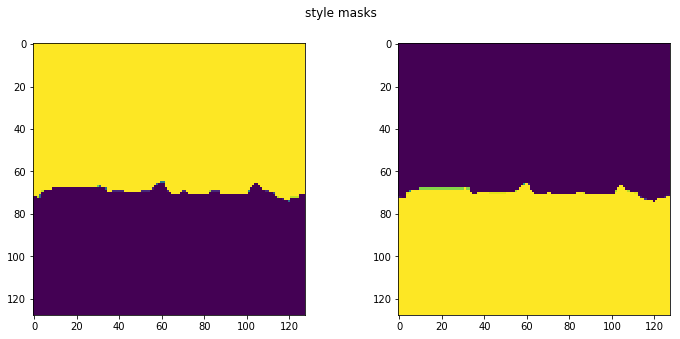

In [30]:
import matplotlib.pyplot as plt
n = len(style_masks)
f,axis = plt.subplots(1,n,figsize=(12,5))
f.suptitle("style masks")
for i in range(n):
    axis[i].imshow(style_masks[i][0][0])


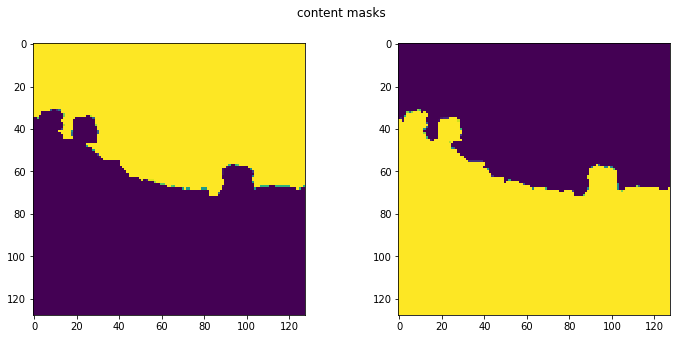

In [31]:
n = len(content_masks)
f,axis = plt.subplots(1,n,figsize=(12,5))
f.suptitle("content masks")
for i in range(n):
    axis[i].imshow(content_masks[i][0][0])

#### Load model

VGG is trained with the following normalization. We use it to normalize our images as well.

In [26]:
vgg = models.vgg19(pretrained=True).features.to(device).eval()

vgg_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
vgg_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

style_layers = ["conv1_1", "conv2_1", "conv3_1", "conv4_1", "conv5_1"]
content_layers = ["conv4_2"]

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\Victor Ruelle/.torch\models\vgg19-dcbb9e9d.pth
100%|███████████████████████████████████████████████████████████████| 574673361/574673361 [09:22<00:00, 1021660.65it/s]


- - - 

### Pipeline

First, we perform the style transfer without the photorealistic regularization then we add the regularization term.

#### reg=False, num_steps=500

In [ ]:
%%time

output = run_style_transfer(
    vgg,
    vgg_normalization_mean,
    vgg_normalization_std,
    style_layers,
    content_layers,
    style_img,
    content_img,
    input_img,
    style_masks,
    content_masks,
    device,
    reg=False,
    style_weight=1e6,
    content_weight=1e4,
    reg_weight=0,
    num_steps=500,
)

C:\Users\Victor Ruelle\OneDrive\Documents\Polytechnique\3A\Deep Learning\Project\Photorealistic-Style-Transfer\neural_style.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
C:\Users\Victor Ruelle\OneDrive\Documents\Polytechnique\3A\Deep Learning\Project\Photorealistic-Style-Transfer\neural_style.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


step   50: S: 111.935 C: 12.108 R:0.000
step  100: S: 82.219 C: 8.408 R:0.000
step  150: S: 62.521 C: 7.362 R:0.000
step  200: S: 51.189 C: 6.562 R:0.000
step  250: S: 43.371 C: 6.127 R:0.000
step  300: S: 38.566 C: 5.620 R:0.000
step  350: S: 34.689 C: 5.449 R:0.000
step  400: S: 32.297 C: 5.092 R:0.000


In [ ]:
plt_images(style_img, input_img, content_img)

#### reg=True, num_steps=500

In [8]:
%%time

output = run_style_transfer(
    vgg,
    vgg_normalization_mean,
    vgg_normalization_std,
    style_layers,
    content_layers,
    style_img,
    content_img,
    input_img,
    style_masks,
    content_masks,
    device,
    reg=True,
    style_weight=1e6,
    content_weight=1e4,
    reg_weight=1e-4,
    num_steps=500,
)

step   50: S: 104.837 C: 10.062 R:595.480
step  100: S: 100.922 C: 9.713 R:549.505
step  150: S: 98.070 C: 9.747 R:535.216
step  200: S: 95.309 C: 10.207 R:571.898
step  250: S: 93.030 C: 11.290 R:676.807
step  300: S: 89.594 C: 11.142 R:800.245
step  350: S: 86.264 C: 10.367 R:910.450
step  400: S: 84.689 C: 11.178 R:1094.587
step  450: S: 79.600 C: 20.341 R:1134.297
step  500: S: 75.326 C: 10.534 R:1167.287
CPU times: user 15min 31s, sys: 2min 1s, total: 17min 33s
Wall time: 8min 50s


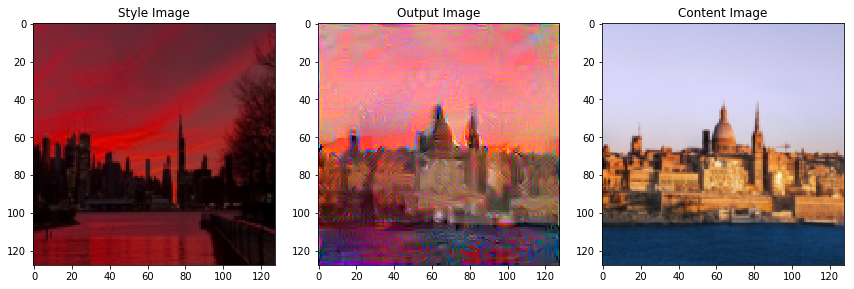

In [9]:
plt_images(style_img, input_img, content_img)